__Ramsey__

We do some numerical explorations of the Ramsey model.

The Ramsey model gave us the law of motion for consumption and capital:

$ c_{t+1} = \frac{\beta^{1/\gamma}}{1+g}(1+f'(k_t)-\delta)^{1/\gamma} c_t $

$k_{t+1} = \frac{1}{1+g}(f(k_t) + (1-\delta)k_t-c_t)$

*If* we know $c_t$ and $k_t$, then it is easy to "solve forward" for $c_{t+1}$ and $k_{t+1}$, and thereafter for $c_{t+2}$ and $k_{t+2}$ etc. The problem is that we don't know $c_t$, it is determined at time $t$ and not pre-determined.

Here is a way to find the initial value of $c_t$ given $k_t$: Start with a guess for $c_t$ and solve forward. If we guess too low, then $c_t$ eventually converges to zero, if we guess too high then $k_t$ eventually converges to zero. So we keep guessing using the "bisection method" and eventually find the right value of $c_t$.

In [8]:
#First we define the constants and the production function:
import numpy as np

alpha = 0.3
delta = 0.1
beta = 0.95
theta = 1.0
g = 0.02

def f(k):
    return k**alpha

def fprime(k):
    return alpha*np.maximum(k, 0.0001)**(alpha-1)


In [9]:
k_init = 2.0

#Law of motion:
def c_new_k_new(c, k):
    k_new = (f(k)+(1-delta)*k-c)/(1+g)
    c_new = (beta*(1+fprime(k_new)-delta))**(1/theta)*c/(1+g)

    return c_new, k_new

def test_c_guess_given_k_init(c_guess, k_init):
    c, k = c_guess, k_init
    
    for i in range(100000):
        c_new, k_new = c_new_k_new(c, k)
        if c_new < 0.001:
            return "low"
        if k_new < 0.001:
            return "high"
        c, k = c_new, k_new
    

In [10]:
c_guess_low = 0.01
c_guess_high = 10.00

while c_guess_high-c_guess_low > 0.0001:
    c_guess = (c_guess_low+c_guess_high)/2.0
    result = test_c_guess_given_k_init(c_guess, k_init)
    if result == "low":
        c_guess_low = c_guess
    if result == "high":
        c_guess_high = c_guess
        
    print(c_guess)

5.005
2.5075
1.2587499999999998
0.6343749999999999
0.9465624999999999
1.10265625
1.0246093749999998
0.9855859374999998
0.9660742187499998
0.9563183593749998
0.9611962890624998
0.9587573242187497
0.9575378417968747
0.9581475830078122
0.9578427124023434
0.9579951477050779
0.9579189300537106


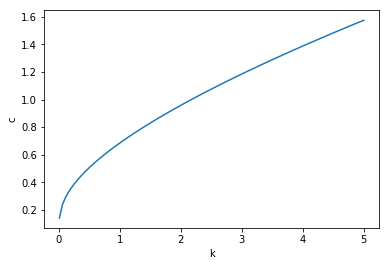

In [12]:
def c_from_k(k_init):

    c_guess_low = 0.01
    c_guess_high = 10.00

    while c_guess_high-c_guess_low > 0.0001:
        c_guess = (c_guess_low+c_guess_high)/2.0
        result = test_c_guess_given_k_init(c_guess, k_init)
        if result == "low":
            c_guess_low = c_guess
        if result == "high":
            c_guess_high = c_guess

    return c_guess

import numpy as np
import pylab as pl
%matplotlib inline
k_values = np.linspace(0.01, 5.0, 100)
c_values = [c_from_k(k_init) for k_init in k_values]
pl.plot(k_values, c_values)
pl.xlabel('k')
pl.ylabel('c')

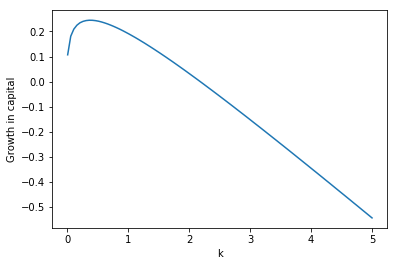

In [14]:
c_new, k_new = c_new_k_new(c_values, k_values)

pl.plot(k_values, k_new-k_values)
pl.xlabel("k")
pl.ylabel("Growth in capital")

In [17]:
#What about Solow model?
#First we compute steady state saving rate in our model:

k_ss = (alpha/((1+g)**theta/beta-(1-delta)))**(1/(1-alpha))
c_ss = f(k_ss)-(delta+g)*k_ss

s = (f(k_ss)-c_ss)/f(k_ss)

s, k_ss

(0.20727272727272733, 2.183167324226742)

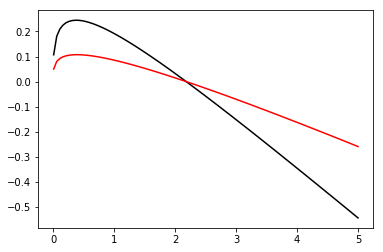

In [19]:
k_new_solow = (s*f(k_values) +(1-delta)*k_values)/(1+g)
pl.plot(k_values, k_new-k_values, color = 'k')
pl.plot(k_values, k_new_solow-k_values, color ='r')